### <h1>Iris dataset</h1>

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
np.random.seed(2021)
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
train_df, test_df = train_test_split(df_iris)
fruits_dict = dict(zip(df_iris['label'].unique(), df_iris['label_names'].unique()))
x_train = train_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y_train = train_df['label']
x_test = test_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y_test = test_df['label']
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
K_best = 0
score_best = 0
for i in range(1,21):
    clf = KNeighborsClassifier(i)
    clf.fit(x_train_scaled, y_train)
    if score_best<clf.score(x_test_scaled, y_test):
        score_best = clf.score(x_test_scaled, y_test)
        K_best = i
print ('The best k = {} , score = {}'.format(K_best, score_best))


The best k = 2 , score = 0.8947368421052632


### <h1>Synthetic dataset</h1>

In [29]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
np.random.seed(2021)
X_R1, y_R1 = make_regression(
    n_samples = 100,
    n_features=1,
    n_informative=1,
    bias = 0,
    noise = 15) 
X_train, X_test = train_test_split(X_R1)
Y_train, Y_test = train_test_split(y_R1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
K_best = 0
score_best = 0
for i in range(1,76):
    clf = KNeighborsRegressor(i)
    clf.fit(X_train_scaled, Y_train)
    if score_best<clf.score(X_test_scaled, Y_test):
        score_best = clf.score(X_test_scaled, Y_test)
        K_best = i
print ('The best k = {} , score = {}'.format(K_best, score_best))


The best k = 5 , score = 0.030928566003674884


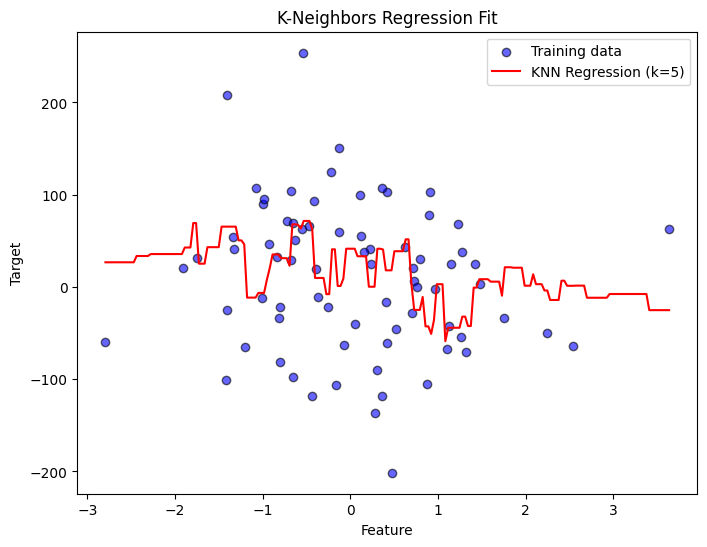

In [31]:
best_knn = KNeighborsRegressor(n_neighbors=5)
best_knn.fit(X_train_scaled, Y_train)
X_range = np.linspace(X_train.min(), X_train.max(), 200).reshape(-1, 1)
X_range_scaled = scaler.fit_transform(X_range)
y_pred = best_knn.predict(X_range_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_train, Y_train, color='blue', label='Training data', edgecolor='k', alpha=0.6)
plt.plot(X_range, y_pred, color='red', label=f'KNN Regression (k={best_knn.n_neighbors})')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("K-Neighbors Regression Fit")
plt.legend()
plt.show()
